In [1]:
library(Signac)
library(Seurat)
library(ggplot2)
library(patchwork)
set.seed(1234)

필요한 패키지를 로딩중입니다: SeuratObject

필요한 패키지를 로딩중입니다: sp


다음의 패키지를 부착합니다: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
library(future)

In [3]:
skin <- readRDS("./RDS/240522.E13_PD4_integrated.2-10.reference.motif.chromvar.newcluster.rds")

In [4]:
skin

An object of class Seurat 
361458 features across 45406 samples within 3 assays 
Active assay: peaks (338904 features, 338904 variable features)
 2 layers present: counts, data
 2 other assays present: RNA, chromvar
 3 dimensional reductions calculated: lsi, umap, peakvi

In [5]:
Idents(object = skin) <- "label"

In [ ]:
custom_order <- c("emFIB-1", "emFIB-2", "FIB-1", "FIB-2", "FIB-3", "FIB-4", "FIB-5", "Pre-adipo", 
                  "DS", "DC/DP", "DP", "APM", "Chond", "emK", "HP/HG", "HFKC-1", "HFKC-2", 
                  "HFKC-3", "HFSBK-1", "HFSBK-2", "BK-1", "BK-2", "SBK", "Immune", "Macrophage", 
                  "Merkel", "Muscle", "Pericyte", "Schwann", "Melanocyte", "VEC", "LEC", "UD")

skin <- SetIdent(skin, value = factor(Idents(skin), levels = custom_order))

levels(Idents(skin))

### chromvar z-score average out

In [7]:
DefaultAssay(skin) <- "chromvar"

In [8]:
skin<-ScaleData(skin) # for creating scale.data slot purposes

Centering and scaling data matrix



In [9]:
#move to counts layer

In [10]:
skin[['chromvar']]@counts <- skin[['chromvar']]@data

In [11]:
head(skin[['chromvar']]@counts)

,E13.5_ATAC_AAACGAAAGCCTCGCA-1,E13.5_ATAC_AAACGAAGTAGACGCA-1,E13.5_ATAC_AAACGAAGTCATAGAA-1,E13.5_ATAC_AAACGAAGTTACTTTC-1,E13.5_ATAC_AAACGAATCTATGAGC-1,E13.5_ATAC_AAACGAATCTGGCGCA-1,E13.5_ATAC_AAACGAATCTGTGTGA-1,E13.5_ATAC_AAACTCGAGATCCGAG-1,E13.5_ATAC_AAACTCGAGTTTACGC-1,E13.5_ATAC_AAACTCGCACAGTTAC-1,⋯,PD4_ATAC_geni2_TTTGTGTCAAGATTAG-1,PD4_ATAC_geni2_TTTGTGTCAAGGGAGG-1,PD4_ATAC_geni2_TTTGTGTCACTGCTTC-1,PD4_ATAC_geni2_TTTGTGTCAGGAGCAT-1,PD4_ATAC_geni2_TTTGTGTCATGCGTTA-1,PD4_ATAC_geni2_TTTGTGTGTCTCAAAC-1,PD4_ATAC_geni2_TTTGTGTGTTCCCTTG-1,PD4_ATAC_geni2_TTTGTGTGTTCTTAGG-1,PD4_ATAC_geni2_TTTGTGTTCAGTCAAC-1,PD4_ATAC_geni2_TTTGTGTTCTCTTAAC-1
MA0004.1,0.3357529,1.8211182,2.6619777,1.4232055,3.369727728,0.21552672,3.34771364,0.49899754,1.0890922,1.9496381,⋯,-0.2980901,-0.55057482,1.9753064,-1.39145346,-0.3942965,0.2034471,-2.0806807,0.5349773,-0.65120536,1.2638723
MA0006.1,1.3493488,3.7805678,3.3853737,2.8957608,3.848994955,0.05515743,6.23439013,1.94682583,2.9566019,2.3225460,⋯,-0.2433676,0.28316081,0.6005140,-0.49917064,0.3919318,-0.3227027,-0.7016179,3.0958031,-0.79035497,0.6089688
MA0019.1,2.4876022,1.3513259,0.1033104,0.5162346,0.751672344,0.95098274,0.21663599,0.72994200,-0.1451705,1.8671991,⋯,-0.1543823,0.04018194,-0.4379891,-1.11370655,2.0758483,1.4767471,-1.2767943,1.5852721,-0.30505448,-0.2093831
MA0029.1,-0.4040601,0.2151640,0.2148139,1.8039795,-0.008185586,1.09135471,3.07788628,0.05034761,1.7115547,1.6697721,⋯,-2.7063415,-2.40417898,1.0745548,-1.67294996,-0.6986756,-4.7713219,-0.5525477,0.9433784,0.03529585,0.6646939
MA0030.1,-1.9184987,1.1811156,-1.3121578,-0.9000813,1.033535777,-0.69737990,-0.05347259,-1.19267308,-0.6345688,-0.6865717,⋯,1.6630174,-1.29902767,1.4974247,-0.07647084,2.5648608,-0.2007967,1.1310585,4.5058286,-1.54744350,2.4611813
MA0031.1,-1.4516013,-0.8735665,-1.5324769,-2.6013481,0.683406258,-1.48574158,-0.05977483,-1.56079425,-0.5126167,-1.1260459,⋯,0.5950593,1.13909062,-0.4587941,-0.35721474,3.0946941,-0.3505035,2.3378869,3.3433801,-0.59418234,1.3096651


In [12]:
head(skin[['chromvar']]@data) #we won't use @data as seurat expect log when averaging out 

,E13.5_ATAC_AAACGAAAGCCTCGCA-1,E13.5_ATAC_AAACGAAGTAGACGCA-1,E13.5_ATAC_AAACGAAGTCATAGAA-1,E13.5_ATAC_AAACGAAGTTACTTTC-1,E13.5_ATAC_AAACGAATCTATGAGC-1,E13.5_ATAC_AAACGAATCTGGCGCA-1,E13.5_ATAC_AAACGAATCTGTGTGA-1,E13.5_ATAC_AAACTCGAGATCCGAG-1,E13.5_ATAC_AAACTCGAGTTTACGC-1,E13.5_ATAC_AAACTCGCACAGTTAC-1,⋯,PD4_ATAC_geni2_TTTGTGTCAAGATTAG-1,PD4_ATAC_geni2_TTTGTGTCAAGGGAGG-1,PD4_ATAC_geni2_TTTGTGTCACTGCTTC-1,PD4_ATAC_geni2_TTTGTGTCAGGAGCAT-1,PD4_ATAC_geni2_TTTGTGTCATGCGTTA-1,PD4_ATAC_geni2_TTTGTGTGTCTCAAAC-1,PD4_ATAC_geni2_TTTGTGTGTTCCCTTG-1,PD4_ATAC_geni2_TTTGTGTGTTCTTAGG-1,PD4_ATAC_geni2_TTTGTGTTCAGTCAAC-1,PD4_ATAC_geni2_TTTGTGTTCTCTTAAC-1
MA0004.1,0.3357529,1.8211182,2.6619777,1.4232055,3.369727728,0.21552672,3.34771364,0.49899754,1.0890922,1.9496381,⋯,-0.2980901,-0.55057482,1.9753064,-1.39145346,-0.3942965,0.2034471,-2.0806807,0.5349773,-0.65120536,1.2638723
MA0006.1,1.3493488,3.7805678,3.3853737,2.8957608,3.848994955,0.05515743,6.23439013,1.94682583,2.9566019,2.3225460,⋯,-0.2433676,0.28316081,0.6005140,-0.49917064,0.3919318,-0.3227027,-0.7016179,3.0958031,-0.79035497,0.6089688
MA0019.1,2.4876022,1.3513259,0.1033104,0.5162346,0.751672344,0.95098274,0.21663599,0.72994200,-0.1451705,1.8671991,⋯,-0.1543823,0.04018194,-0.4379891,-1.11370655,2.0758483,1.4767471,-1.2767943,1.5852721,-0.30505448,-0.2093831
MA0029.1,-0.4040601,0.2151640,0.2148139,1.8039795,-0.008185586,1.09135471,3.07788628,0.05034761,1.7115547,1.6697721,⋯,-2.7063415,-2.40417898,1.0745548,-1.67294996,-0.6986756,-4.7713219,-0.5525477,0.9433784,0.03529585,0.6646939
MA0030.1,-1.9184987,1.1811156,-1.3121578,-0.9000813,1.033535777,-0.69737990,-0.05347259,-1.19267308,-0.6345688,-0.6865717,⋯,1.6630174,-1.29902767,1.4974247,-0.07647084,2.5648608,-0.2007967,1.1310585,4.5058286,-1.54744350,2.4611813
MA0031.1,-1.4516013,-0.8735665,-1.5324769,-2.6013481,0.683406258,-1.48574158,-0.05977483,-1.56079425,-0.5126167,-1.1260459,⋯,0.5950593,1.13909062,-0.4587941,-0.35721474,3.0946941,-0.3505035,2.3378869,3.3433801,-0.59418234,1.3096651


In [13]:
head(skin[['chromvar']]@scale.data)

,E13.5_ATAC_AAACGAAAGCCTCGCA-1,E13.5_ATAC_AAACGAAGTAGACGCA-1,E13.5_ATAC_AAACGAAGTCATAGAA-1,E13.5_ATAC_AAACGAAGTTACTTTC-1,E13.5_ATAC_AAACGAATCTATGAGC-1,E13.5_ATAC_AAACGAATCTGGCGCA-1,E13.5_ATAC_AAACGAATCTGTGTGA-1,E13.5_ATAC_AAACTCGAGATCCGAG-1,E13.5_ATAC_AAACTCGAGTTTACGC-1,E13.5_ATAC_AAACTCGCACAGTTAC-1,⋯,PD4_ATAC_geni2_TTTGTGTCAAGATTAG-1,PD4_ATAC_geni2_TTTGTGTCAAGGGAGG-1,PD4_ATAC_geni2_TTTGTGTCACTGCTTC-1,PD4_ATAC_geni2_TTTGTGTCAGGAGCAT-1,PD4_ATAC_geni2_TTTGTGTCATGCGTTA-1,PD4_ATAC_geni2_TTTGTGTGTCTCAAAC-1,PD4_ATAC_geni2_TTTGTGTGTTCCCTTG-1,PD4_ATAC_geni2_TTTGTGTGTTCTTAGG-1,PD4_ATAC_geni2_TTTGTGTTCAGTCAAC-1,PD4_ATAC_geni2_TTTGTGTTCTCTTAAC-1
MA0004.1,0.2406169,1.2730700,1.85753759,0.9964874,2.3494829933,0.15704965,2.33418136,0.35408557,0.7642507,1.3624020,⋯,-0.1999569,-0.37545495,1.3802436,-0.959935896,-0.2668284,0.14865328,-1.4390064,0.3790945,-0.44540159,0.8857374
MA0006.1,0.7947887,2.2351547,2.00102352,1.7109543,2.2756940745,0.02805019,3.68891192,1.14876158,1.7469993,1.3713555,⋯,-0.1488098,0.16312988,0.3511445,-0.300359259,0.2275708,-0.19581156,-0.4202983,1.8294686,-0.47287025,0.3561535
MA0019.1,2.1626896,1.1726902,0.08533614,0.4451032,0.6502321548,0.82388461,0.18407294,0.63129924,-0.1311569,1.6221532,⋯,-0.1391828,0.03033445,-0.3862799,-0.975009846,1.8039422,1.28196541,-1.1171027,1.3765196,-0.27045845,-0.1871032
MA0029.1,-0.2593047,0.1456228,0.14539388,1.1845926,-0.0004315957,0.71858782,2.01763506,0.03784486,1.1241535,1.0968307,⋯,-1.7648294,-1.56723710,0.7076019,-1.089066475,-0.4519618,-3.11517652,-0.3564048,0.6218221,0.02800211,0.4395827
MA0030.1,-1.0255259,0.6896521,-0.69000592,-0.4619825,0.6079885176,-0.34981727,0.00649018,-0.62388878,-0.3150606,-0.3438365,⋯,0.9563135,-0.68274032,0.8646824,-0.006235951,1.4553504,-0.07503195,0.6619529,2.5293890,-0.82020173,1.3979791
MA0031.1,-0.7288709,-0.4205936,-0.77200344,-1.3420534,0.4097705975,-0.74707856,0.01341752,-0.78710562,-0.2280919,-0.5552458,⋯,0.3626534,0.65279602,-0.1993873,-0.145213024,1.6957578,-0.14163378,1.2921376,1.8283869,-0.27159250,0.7437668


In [14]:
agg <- AverageExpression(skin, 
                         assay = "chromvar", 
                         return.seurat = TRUE, 
                         slot = "counts"
                         )

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Warning message:
“Data is of class dgeMatrix. Coercing to dgCMatrix.”
Warning message in log1p(x = as.matrix(x = data.return[[1]])):
“NaN이 생성되었습니다”
Centering and scaling data matrix



In [15]:
head(agg[['chromvar']]$data)

,emFIB-1,emFIB-2,FIB-1,FIB-2,FIB-3,FIB-4,FIB-5,Pre-adipo,DS,DC/DP,⋯,Immune,Macrophage,Merkel,Muscle,Pericyte,Schwann,Melanocyte,VEC,LEC,UD
MA0004.1,0.8886480,1.05385855,0.02439842,-0.09750512,-0.6343754,-0.5461111,-0.29409158,NaN,-1.413962669,-0.25078976,⋯,1.2155355,1.0226129,0.7302876,0.35409130,-1.93753889,NaN,1.08462911,0.4714584,0.74467175,0.47416734
MA0006.1,1.0613861,1.36161301,0.44774982,0.35980768,0.2590359,0.1896298,0.69495215,-0.2549107,-0.224179519,0.43943442,⋯,0.4683701,-0.6827196,0.3333349,0.73593917,-0.51114401,0.6622769,0.06799032,0.1231650,0.37486905,NaN
MA0019.1,0.1471387,0.59935767,-0.16628573,-0.34587275,0.2880157,0.3327556,0.32327815,0.3074212,-0.408257291,-0.09475409,⋯,-1.2091695,NaN,0.2040860,0.28786657,-0.57293606,0.1788414,-0.27696843,-0.3195619,0.20244593,NaN
MA0029.1,-0.1954880,0.84506726,NaN,NaN,-1.3636984,0.5369549,-0.56740801,0.4027766,NaN,NaN,⋯,0.9688806,NaN,0.2041075,-0.20455329,-1.17017788,-0.6425279,-0.29227453,-0.3015459,-0.01058831,-0.05737901
MA0030.1,-0.6308950,0.05765599,-0.31444622,NaN,-1.4961527,-0.8655206,0.01968354,-0.1135589,-0.021939610,0.50717564,⋯,-0.4577381,-0.9827162,0.8878277,0.41311932,0.09179808,0.1010409,0.64384832,1.0873617,1.07342421,0.36530051
MA0031.1,-1.4338160,-1.26963790,0.20421385,-1.16814594,-0.6206242,-1.1570390,0.21167831,-0.1319464,0.002378131,0.59533322,⋯,-1.0008748,-1.1556174,0.8249304,0.04262021,-0.59391752,-0.3663005,0.52439285,0.8352666,0.73381223,0.98908547


In [16]:
head(agg[['chromvar']]$scale.data)

,emFIB-1,emFIB-2,FIB-1,FIB-2,FIB-3,FIB-4,FIB-5,Pre-adipo,DS,DC/DP,⋯,Immune,Macrophage,Merkel,Muscle,Pericyte,Schwann,Melanocyte,VEC,LEC,UD
MA0004.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MA0006.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MA0019.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MA0029.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MA0030.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MA0031.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [17]:
head(agg[['chromvar']]$counts) ## this is chormvar z-score average count

  [[ suppressing 33 column names ‘emFIB-1’, ‘emFIB-2’, ‘FIB-1’ ... ]]



6 x 33 sparse Matrix of class "dgCMatrix"
                                                                            
MA0004.1  1.4318397  1.86869879  0.0246985 -0.09290231 -0.4697334 -0.4208021
MA0006.1  1.8903746  2.90248297  0.5647872  0.43305379  0.2956803  0.2088020
MA0019.1  0.1585146  0.82094877 -0.1531958 -0.29239748  0.3337783  0.3948064
MA0029.1 -0.1775668  1.32813441 -1.7649817 -1.57081274 -0.7442867  0.7107894
MA0030.1 -0.4678846  0.05935051 -0.2698069 -1.05524869 -0.7760097 -0.5791676
MA0031.1 -0.7616025 -0.71906667  0.2265604 -0.68905709 -0.4623913 -0.6855842
                                                                              
MA0004.1 -0.25479176 -1.1352710 -0.756822262 -0.22181404 -0.5113444 -0.2075037
MA0006.1  1.00361319 -0.2250143 -0.200828345  0.55182929  0.6980933  1.0092712
MA0019.1  0.38164960  0.3599136 -0.335192192 -0.09040341  0.3072532 -0.4194289
MA0029.1 -0.43300683  0.4959727 -1.201657489 -1.07845778 -1.7147181 -1.9236808
MA0030.1  0.01987854 -0.

In [18]:
agg_cvar <- agg

In [19]:
agg_cvar

An object of class Seurat 
746 features across 33 samples within 1 assay 
Active assay: chromvar (746 features, 0 variable features)
 3 layers present: counts, data, scale.data

In [20]:
agg_cvar_counts <- GetAssayData(object = agg_cvar, assay = "chromvar", slot = "counts") #average z-score

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


In [21]:
agg_cvar_counts

  [[ suppressing 33 column names ‘emFIB-1’, ‘emFIB-2’, ‘FIB-1’ ... ]]



746 x 33 sparse Matrix of class "dgCMatrix"
                                                                            
MA0004.1  1.4318396865  1.868698794  0.0246984994 -0.092902307 -4.697334e-01
MA0006.1  1.8903745773  2.902482972  0.5647871610  0.433053785  2.956803e-01
MA0019.1  0.1585146065  0.820948775 -0.1531957613 -0.292397478  3.337783e-01
MA0029.1 -0.1775668116  1.328134407 -1.7649817192 -1.570812736 -7.442867e-01
MA0030.1 -0.4678846385  0.059350509 -0.2698068724 -1.055248689 -7.760097e-01
MA0031.1 -0.7616025403 -0.719066670  0.2265604212 -0.689057085 -4.623913e-01
MA0040.1  0.1262294673  0.703529111  0.6369537443 -0.080082541 -1.475566e-01
MA0041.1  1.2756936516  2.375371043  1.1133022897 -0.207649885  3.954592e-01
MA0051.1  0.9777881490  2.160357204  0.8921278907  0.480319506  9.333963e-01
MA0057.1  1.7682624572  2.887538112  1.2386251337  0.706012033  8.241967e-01
MA0059.1  2.2883650388  1.577906106  1.0849580296  0.853383415  2.092059e-01
MA0066.1 -0.6888295373 -0.687587

In [22]:
Average_motif<-as.data.frame(agg_cvar_counts)

### chromvar findallmarker

In [ ]:
#with fresh data

In [ ]:
skin <- readRDS("./RDS/240522.E13_PD4_integrated.2-10.reference.motif.chromvar.newcluster.rds")

In [ ]:
skin

In [ ]:
Idents(object = skin) <- "label"

In [ ]:
DefaultAssay(skin) <- "chromvar"

In [ ]:
head(skin[['chromvar']]@counts) # shouldn't have anthing

In [ ]:
differential.activity <- FindAllMarkers(
  object = skin,
  only.pos = TRUE,
    mean.fxn = rowMeans,
    fc.name = "avg_diff" 
)

Calculating cluster APM

Calculating cluster BK-1

Calculating cluster BK-2

Calculating cluster Chond

Calculating cluster DC/DP

Calculating cluster DP

Calculating cluster DS

Calculating cluster emFIB-1

Calculating cluster emFIB-2

Calculating cluster emK

Calculating cluster FIB-1

Calculating cluster FIB-2

Calculating cluster FIB-3

Calculating cluster FIB-4

Calculating cluster FIB-5

Calculating cluster HFKC-1

Calculating cluster HFKC-2



In [ ]:
head(differential.activity)

In [ ]:
#write.csv(differential.activity, "240922_Differential_Motif_chromvar_counts.csv", row.names = FALSE)

### motif lookup

In [23]:
differential.activity = read.csv ("240922_Differential_Motif_chromvar_counts.csv")

In [24]:
library(TFBSTools)
library(JASPAR2020)
library(motifmatchr)

In [25]:
opts <- list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE) 
jaspar_motifs <- getMatrixSet(JASPAR2020, opts)

motif_lookup <- data.frame(
  ID = sapply(jaspar_motifs, name),  # Motif IDs
  Name = names(jaspar_motifs)        # Corresponding gene names
)

head(motif_lookup)

,ID,Name
,<chr>,<chr>
MA0004.1,Arnt,MA0004.1
MA0006.1,Ahr::Arnt,MA0006.1
MA0019.1,Ddit3::Cebpa,MA0019.1
MA0029.1,Mecom,MA0029.1
MA0030.1,FOXF2,MA0030.1
MA0031.1,FOXD1,MA0031.1


In [26]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [27]:
differential.activity$original_order <- 1:nrow(differential.activity)
differential.activity <- merge(differential.activity, motif_lookup, by.x = "gene", by.y = "Name", all.x = TRUE)
names(differential.activity)[names(differential.activity) == "ID"] <- "gene_name"
differential.activity <- differential.activity[order(differential.activity$original_order), ]
differential.activity <- differential.activity %>% select(-original_order)
head(differential.activity)

,gene,p_val,avg_diff,pct.1,pct.2,p_val_adj,cluster,gene_name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7724,MA1108.2,0,5.922299,0.991,0.331,0,emFIB-1,MXI1
3300,MA0607.1,0,7.546102,0.991,0.335,0,emFIB-1,Bhlha15
4170,MA0668.1,0,7.264650,0.995,0.355,0,emFIB-1,NEUROD2
9862,MA1568.1,0,6.832128,0.997,0.358,0,emFIB-1,TCF21(var.2)
3530,MA0623.2,0,6.964981,0.994,0.355,0,emFIB-1,NEUROG1
3666,MA0633.1,0,9.075908,0.994,0.357,0,emFIB-1,Twist2


In [ ]:
#write.csv(differential.activity, "240922_Differential_Motif_chromvar_counts.withgenes.csv", row.names = FALSE)

In [ ]:
differential.activity = read.csv ("240922_Differential_Motif_chromvar_counts.withgenes.csv")

In [28]:
differential.activity = read.csv ("241108_Differential_Motif_chromvar_counts.withgenes.csv") #same

In [29]:
head(differential.activity)

,gene,p_val,avg_diff,pct.1,pct.2,p_val_adj,cluster,gene_name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,MA1108.2,0,5.922299,0.991,0.331,0,emFIB-1,MXI1
2,MA0607.1,0,7.546102,0.991,0.335,0,emFIB-1,Bhlha15
3,MA0668.1,0,7.264650,0.995,0.355,0,emFIB-1,NEUROD2
4,MA1568.1,0,6.832128,0.997,0.358,0,emFIB-1,TCF21(var.2)
5,MA0623.2,0,6.964981,0.994,0.355,0,emFIB-1,NEUROG1
6,MA0633.1,0,9.075908,0.994,0.357,0,emFIB-1,Twist2


In [31]:
differential.activity <- differential.activity %>%
  mutate(cluster = factor(cluster, levels = unique(cluster)))

top5 <- differential.activity %>%
  group_by(cluster) %>%
  filter(avg_diff > 1.0) %>%
  slice_head(n = 5) %>%  
  ungroup()

print(top5)

# A tibble: 165 × 9
   gene     p_val avg_diff pct.1 pct.2 p_val_adj cluster gene_name    motif_id
   <chr>    <dbl>    <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>        <chr>   
 1 MA1108.2     0     5.92 0.991 0.331         0 emFIB-1 MXI1         1       
 2 MA0607.1     0     7.55 0.991 0.335         0 emFIB-1 Bhlha15      2       
 3 MA0668.1     0     7.26 0.995 0.355         0 emFIB-1 NEUROD2      3       
 4 MA1568.1     0     6.83 0.997 0.358         0 emFIB-1 TCF21(var.2) 4       
 5 MA0623.2     0     6.96 0.994 0.355         0 emFIB-1 NEUROG1      5       
 6 MA0817.1     0     5.19 0.981 0.402         0 emFIB-2 BHLHE23      382     
 7 MA0668.1     0     4.93 0.974 0.399         0 emFIB-2 NEUROD2      383     
 8 MA0826.1     0     5.20 0.978 0.403         0 emFIB-2 OLIG1        384     
 9 MA1568.1     0     4.42 0.97  0.402         0 emFIB-2 TCF21(var.2) 385     
10 MA0827.1     0     5.42 0.984 0.418         0 emFIB-2 OLIG3        386     
# ℹ 155 more rows


In [32]:
key_motifs<-unique(c(top5$gene))

In [33]:
key_motifs

[1] "MA1108.2" "MA0607.1" "MA0668.1" "MA1568.1" "MA0623.2" "MA0817.1"
  [7] "MA0826.1" "MA0827.1" "MA0633.1" "MA0818.1" "MA1123.2" "MA1638.1"
 [13] "MA1618.1" "MA0698.1" "MA1468.1" "MA1624.1" "MA0519.1" "MA0137.3"
 [19] "MA0144.2" "MA0518.1" "MA0092.1" "MA0152.1" "MA0624.1" "MA1579.1"
 [25] "MA0039.4" "MA0599.1" "MA0002.2" "MA0808.1" "MA1107.2" "MA1463.1"
 [31] "MA0675.1" "MA0702.2" "MA0716.1" "MA0704.1" "MA0868.2" "MA0077.1"
 [37] "MA0515.1" "MA0713.1" "MA1120.1" "MA0052.4" "MA0773.1" "MA0497.1"
 [43] "MA0660.1" "MA0083.3" "MA0606.1" "MA0625.1" "MA1525.1" "MA0139.1"
 [49] "MA1102.2" "MA0861.1" "MA0506.1" "MA0748.2" "MA0523.1" "MA0769.2"
 [55] "MA0768.1" "MA0525.2" "MA1105.2" "MA0661.1" "MA0886.1" "MA0887.1"
 [61] "MA0888.1" "MA0889.1" "MA1501.1" "MA1495.1" "MA0158.2" "MA0904.2"
 [67] "MA0466.2" "MA1487.1" "MA0837.1" "MA0836.2" "MA0838.1" "MA1148.1"
 [73] "MA0102.4" "MA1636.1" "MA0043.3" "MA1633.1" "MA0478.1" "MA1622.1"
 [79] "MA0489.1" "MA1101.2" "MA0106.3" "MA0103.3" "MA1621.1" "MA0099.3"
 [85] "MA1141.1" "MA0759.1" "MA0028.2" "MA0763.1" "MA0765.2" "MA0156.2"
 [91] "MA0473.3" "MA0640.2" "MA0136.2" "MA0764.2" "MA0761.2" "MA0683.1"
 [97] "MA0791.1" "MA0790.1" "MA0499.2" "MA0153.2" "MA1100.2" "MA0816.1"
[103] "MA0048.2" "MA0665.1" "MA0500.2" "MA1604.1" "MA1637.1" "MA0154.4"
[109] "MA0867.2" "MA0442.2" "MA1111.1" "MA0017.2" "MA0692.1" "MA0831.2"
[115] "MA0526.3" "MA0620.3" "MA0093.3" "MA0762.1" "MA1508.1" "MA0062.3"
[121] "MA0636.1" "MA0095.2"

In [34]:
library(pheatmap)

In [35]:
forplot3<-Average_motif[key_motifs,]

In [ ]:
name_to_id_map <- setNames(motif_lookup$ID, motif_lookup$Name)
rownames(forplot3) <- name_to_id_map[rownames(forplot3)]
head(forplot3)

In [88]:
options(repr.plot.width = 5, repr.plot.height = 12, repr.plot.res = 300)

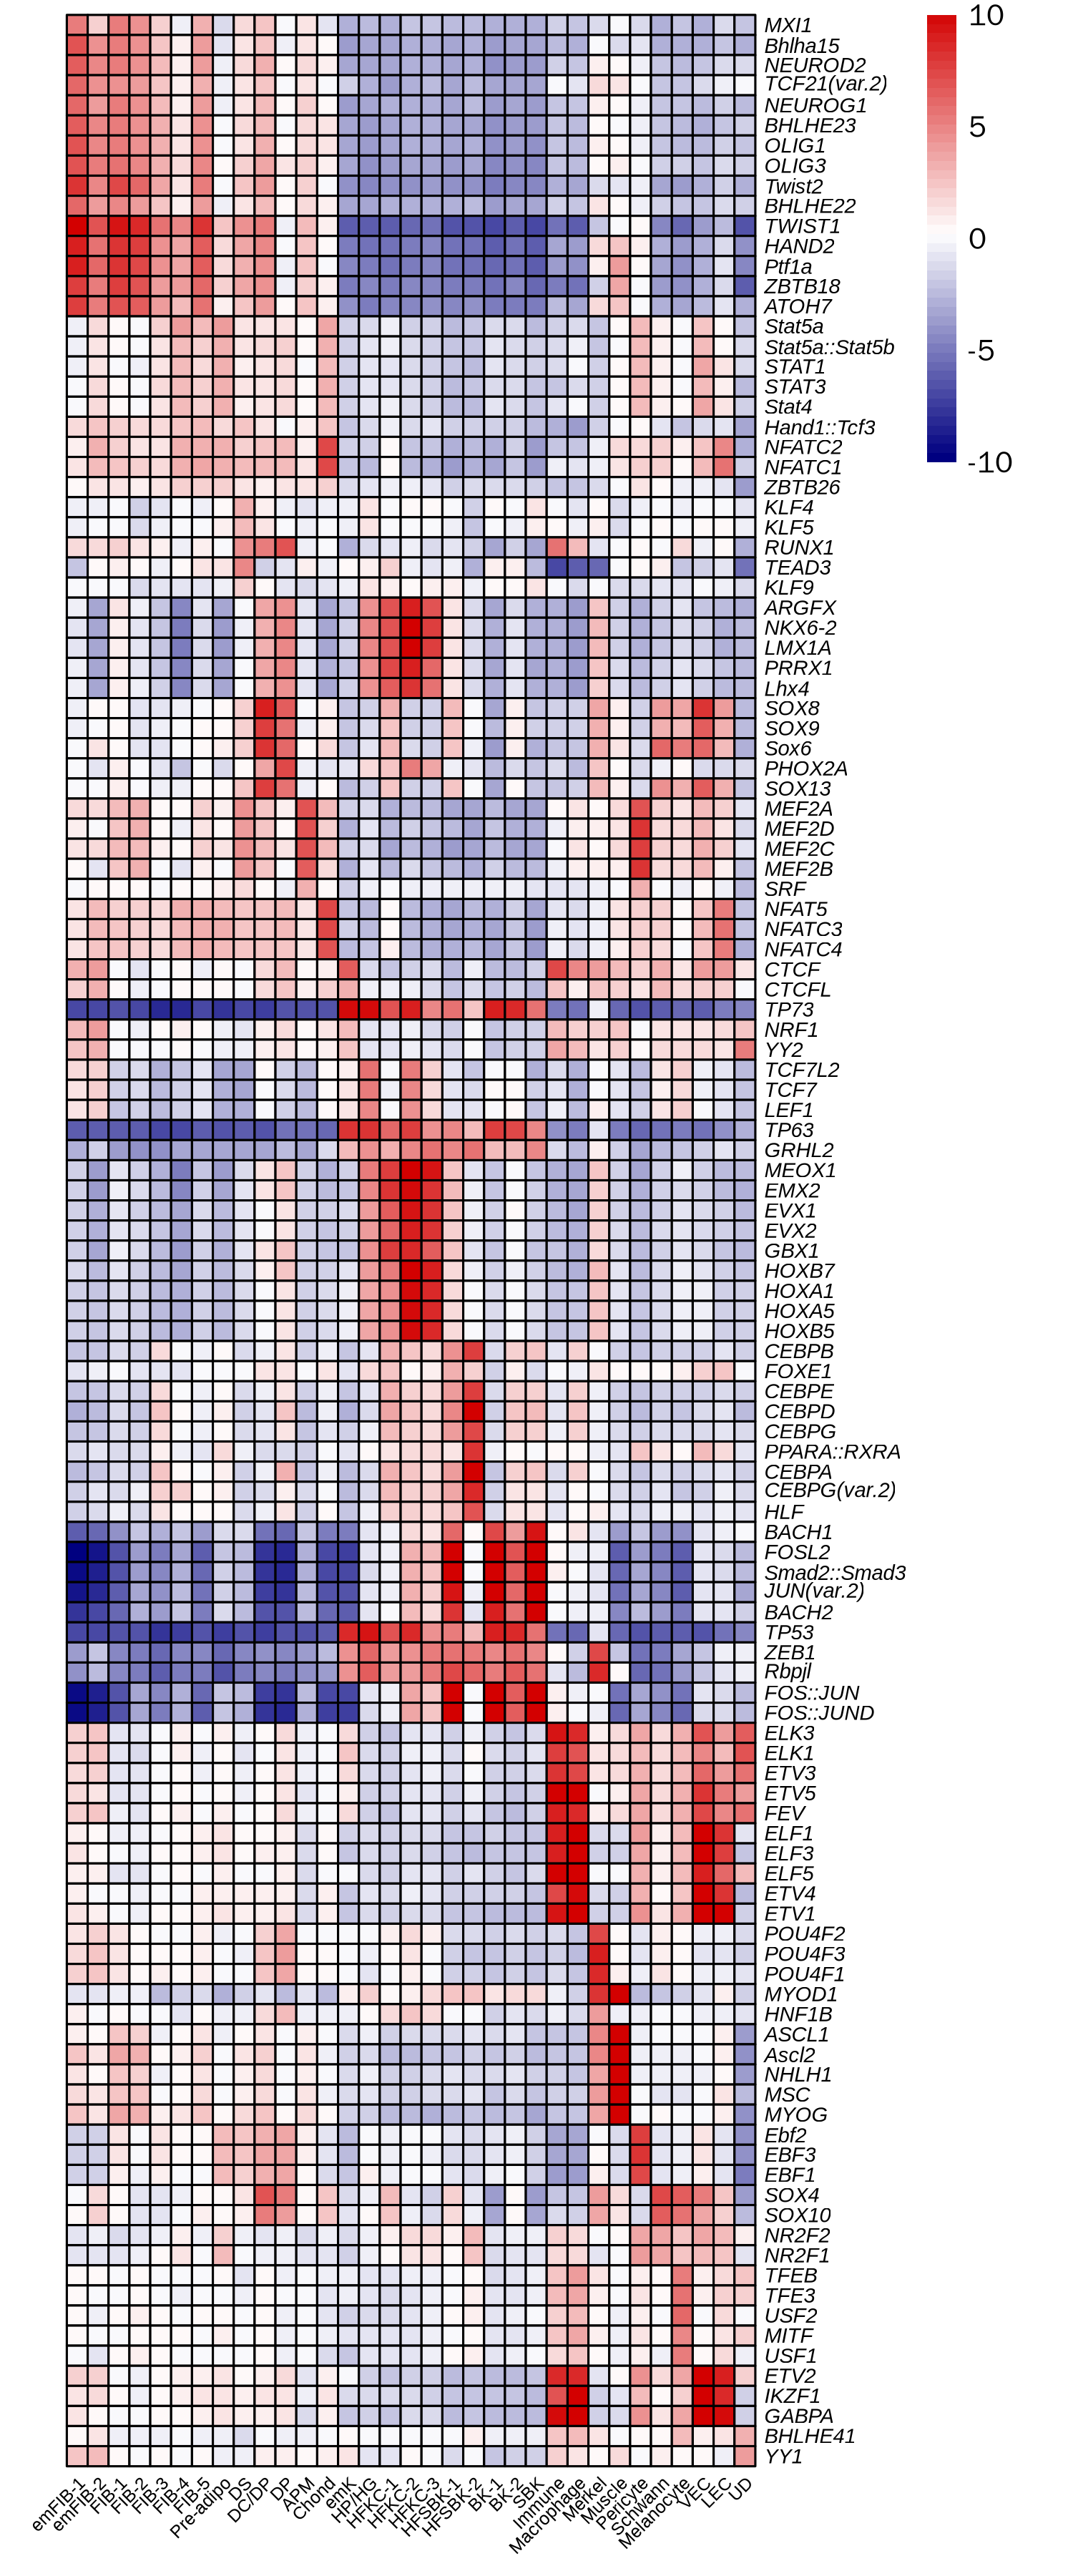

In [89]:
# Custom function to create italicized labels
custom_italics <- function(labels) {
  sapply(labels, function(label) as.expression(bquote(italic(.(label)))))
}

# Generate the heatmap with properly italicized row labels
heatmap_grob <- pheatmap(
  forplot3,
  color = colorRampPalette(c("#000080", "white", "#D30000"))(50),  # Define the color palette
  cluster_rows = FALSE,  # Don't cluster rows, use the sorted order
  cluster_cols = FALSE,  # Don't cluster columns, use the custom order
  #scale = "row",         # Optionally scale the data by rows
  border_color = 'black',
  angle_col = 45,        # Rotate column labels by 45 degrees
  show_rownames = TRUE,  # Display row names
  fontsize_row = 7,     # Adjust row label font size
  fontsize_col = 6,
  cellwidth = 7,  # Adjust cell width to prevent overlap
  breaks = seq(from=-10, to=10, length.out=50), # max and min scale bar
  labels_row = custom_italics(rownames(forplot3))  # Italicize row names
)

ggsave("./Fig2_rxiv/250221.motif.heatmap.svg", plot=heatmap_grob, width =5, height =12, units = 'in')

### peaks findallmarkers

In [ ]:
DefaultAssay(skin) <- "peaks"

In [ ]:
skin

In [ ]:
Idents(object = skin)

In [ ]:
da_peaks <- FindAllMarkers(
    object = skin,
    test.use = 'wilcox',
    min.pct = 0.1
) # slot = data

In [ ]:
da_peaks

In [ ]:
da_peaks_filtered <- da_peaks[da_peaks$avg_log2FC > 1.0, ]
da_peaks_filtered

In [ ]:
da_peaks_filtered <- da_peaks_filtered[da_peaks_filtered$p_val_adj < 0.005, ]
da_peaks_filtered

In [ ]:
closestfeatures<-ClosestFeature(skin, da_peaks_filtered$gene)

In [ ]:
da_peaks_filtered$closest_feature<-closestfeatures$gene_name


In [ ]:
da_peaks_filtered

In [ ]:
write.csv(da_peaks_filtered, "240922.DA_peaks.Log1.0.p_val0.005.csv", row.names = FALSE)

In [39]:
da_peaks_filtered <- read.csv("240922.DA_peaks.Log1.0.p_val0.005.csv")

In [40]:
da_peaks_filtered <- da_peaks_filtered %>%
  mutate(cluster = factor(cluster, levels = unique(cluster)))

top_2_per_cluster <- da_peaks_filtered %>%
  group_by(cluster) %>%
  arrange(p_val_adj) %>%
  slice_head(n = 2)

# View the result
print(top_2_per_cluster)

# A tibble: 66 × 8
# Groups:   cluster [33]
   p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene           closest_feature
   <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>          <chr>          
 1     0       2.55 0.544 0.1           0 emFIB-1 chr13-7140326… 8030423J24Rik  
 2     0       1.28 0.761 0.33          0 emFIB-1 chr2-32316948… Dnm1           
 3     0       2.37 0.706 0.158         0 emFIB-2 chr4-54469196… Gm29067        
 4     0       1.96 0.695 0.206         0 emFIB-2 chr3-11625106… Gpr88          
 5     0       2.17 0.544 0.139         0 FIB-1   chr14-2512580… Gm10398        
 6     0       1.95 0.558 0.155         0 FIB-1   chr14-2236368… 1700112E06Rik  
 7     0       2.10 0.628 0.168         0 FIB-2   chr1-11914303… Gm26831        
 8     0       2.18 0.535 0.129         0 FIB-2   chr19-1241281… Olfr1441       
 9     0       2.86 0.599 0.091         0 FIB-3   chr10-1158962… Tspan8         
10     0       2.20 0.591 0.144         0 FIB-3   chr5-29387337… 

In [ ]:
clusters_to_reduce <- c("Immune", "Macrophage", "Merkel", "Muscle", 
                          "Pericyte", "Schwann", "Melanocyte", "VEC", 
                          "LEC", "UD")
top_2_per_cluster <- top_2_per_cluster %>%
  group_by(cluster) %>%
  filter(!(cluster %in% clusters_to_reduce) | row_number() == 1) %>%
  ungroup()

In [42]:
top2_peaks <- top_2_per_cluster$gene

In [43]:
top2_peaks_unique <- unique(top2_peaks)

# View the result
head(top2_peaks_unique)

[1] "chr13-71403268-71405163"  "chr2-32316948-32320336"  
[3] "chr4-54469196-54471546"   "chr3-116251069-116254169"
[5] "chr14-25125807-25128267"  "chr14-22363681-22365345"

In [44]:
top2_peaks_unique

[1] "chr13-71403268-71405163"   "chr2-32316948-32320336"   
 [3] "chr4-54469196-54471546"    "chr3-116251069-116254169" 
 [5] "chr14-25125807-25128267"   "chr14-22363681-22365345"  
 [7] "chr1-119143030-119146005"  "chr19-12412817-12415094"  
 [9] "chr10-115896242-115897873" "chr5-29387337-29389714"   
[11] "chr1-156779860-156782534"  "chr9-116846846-116848791" 
[13] "chr19-40652970-40653393"   "chr11-81488284-81489449"  
[15] "chr2-33159544-33161146"    "chr18-80094427-80096287"  
[17] "chr7-49309035-49310553"    "chr3-38825339-38826780"   
[19] "chr8-45874849-45877453"    "chr6-92816105-92818130"   
[21] "chr3-107260491-107262410"  "chr3-39452608-39453069"   
[23] "chr12-33741723-33742054"   "chr14-76798491-76800685"  
[25] "chr3-63136985-63138724"    "chr1-182685731-182687082" 
[27] "chr12-107571877-107573150" "chr14-105531798-105534014"
[29] "chr9-120797720-120799549"  "chr6-53642123-53644403"   
[31] "chr6-16076779-16078535"    "chr13-53531520-53534117"  
[33] "chr5-136604931-136607175"  "chr5-64429921-64432219"   
[35] "chr18-12627249-12628973"   "chr13-110625714-110628104"
[37] "chr6-148109015-148111624"  "chr9-86850024-86851999"   
[39] "chr7-89539367-89541767"    "chr14-99630500-99632803"  
[41] "chr6-147784111-147786778"  "chr13-72197581-72199602"  
[43] "chr3-92032901-92035130"    "chr10-18859602-18861764"  
[45] "chr10-62542646-62543983"   "chr19-10841476-10843126"  
[47] "chr1-132660323-132660747"  "chr11-11871367-11873905"  
[49] "chr15-73731701-73733375"   "chr2-64394234-64395520"   
[51] "chr1-20302119-20303557"    "chr18-5931587-5932971"    
[53] "chr7-82202944-82204971"    "chr2-28597846-28599457"

In [ ]:
gene_to_feature_map <- setNames(top_2_per_cluster$closest_feature, top_2_per_cluster$gene)
top2_peaks_replaced <- gene_to_feature_map[top2_peaks_unique]
print(top2_peaks_replaced)

In [46]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


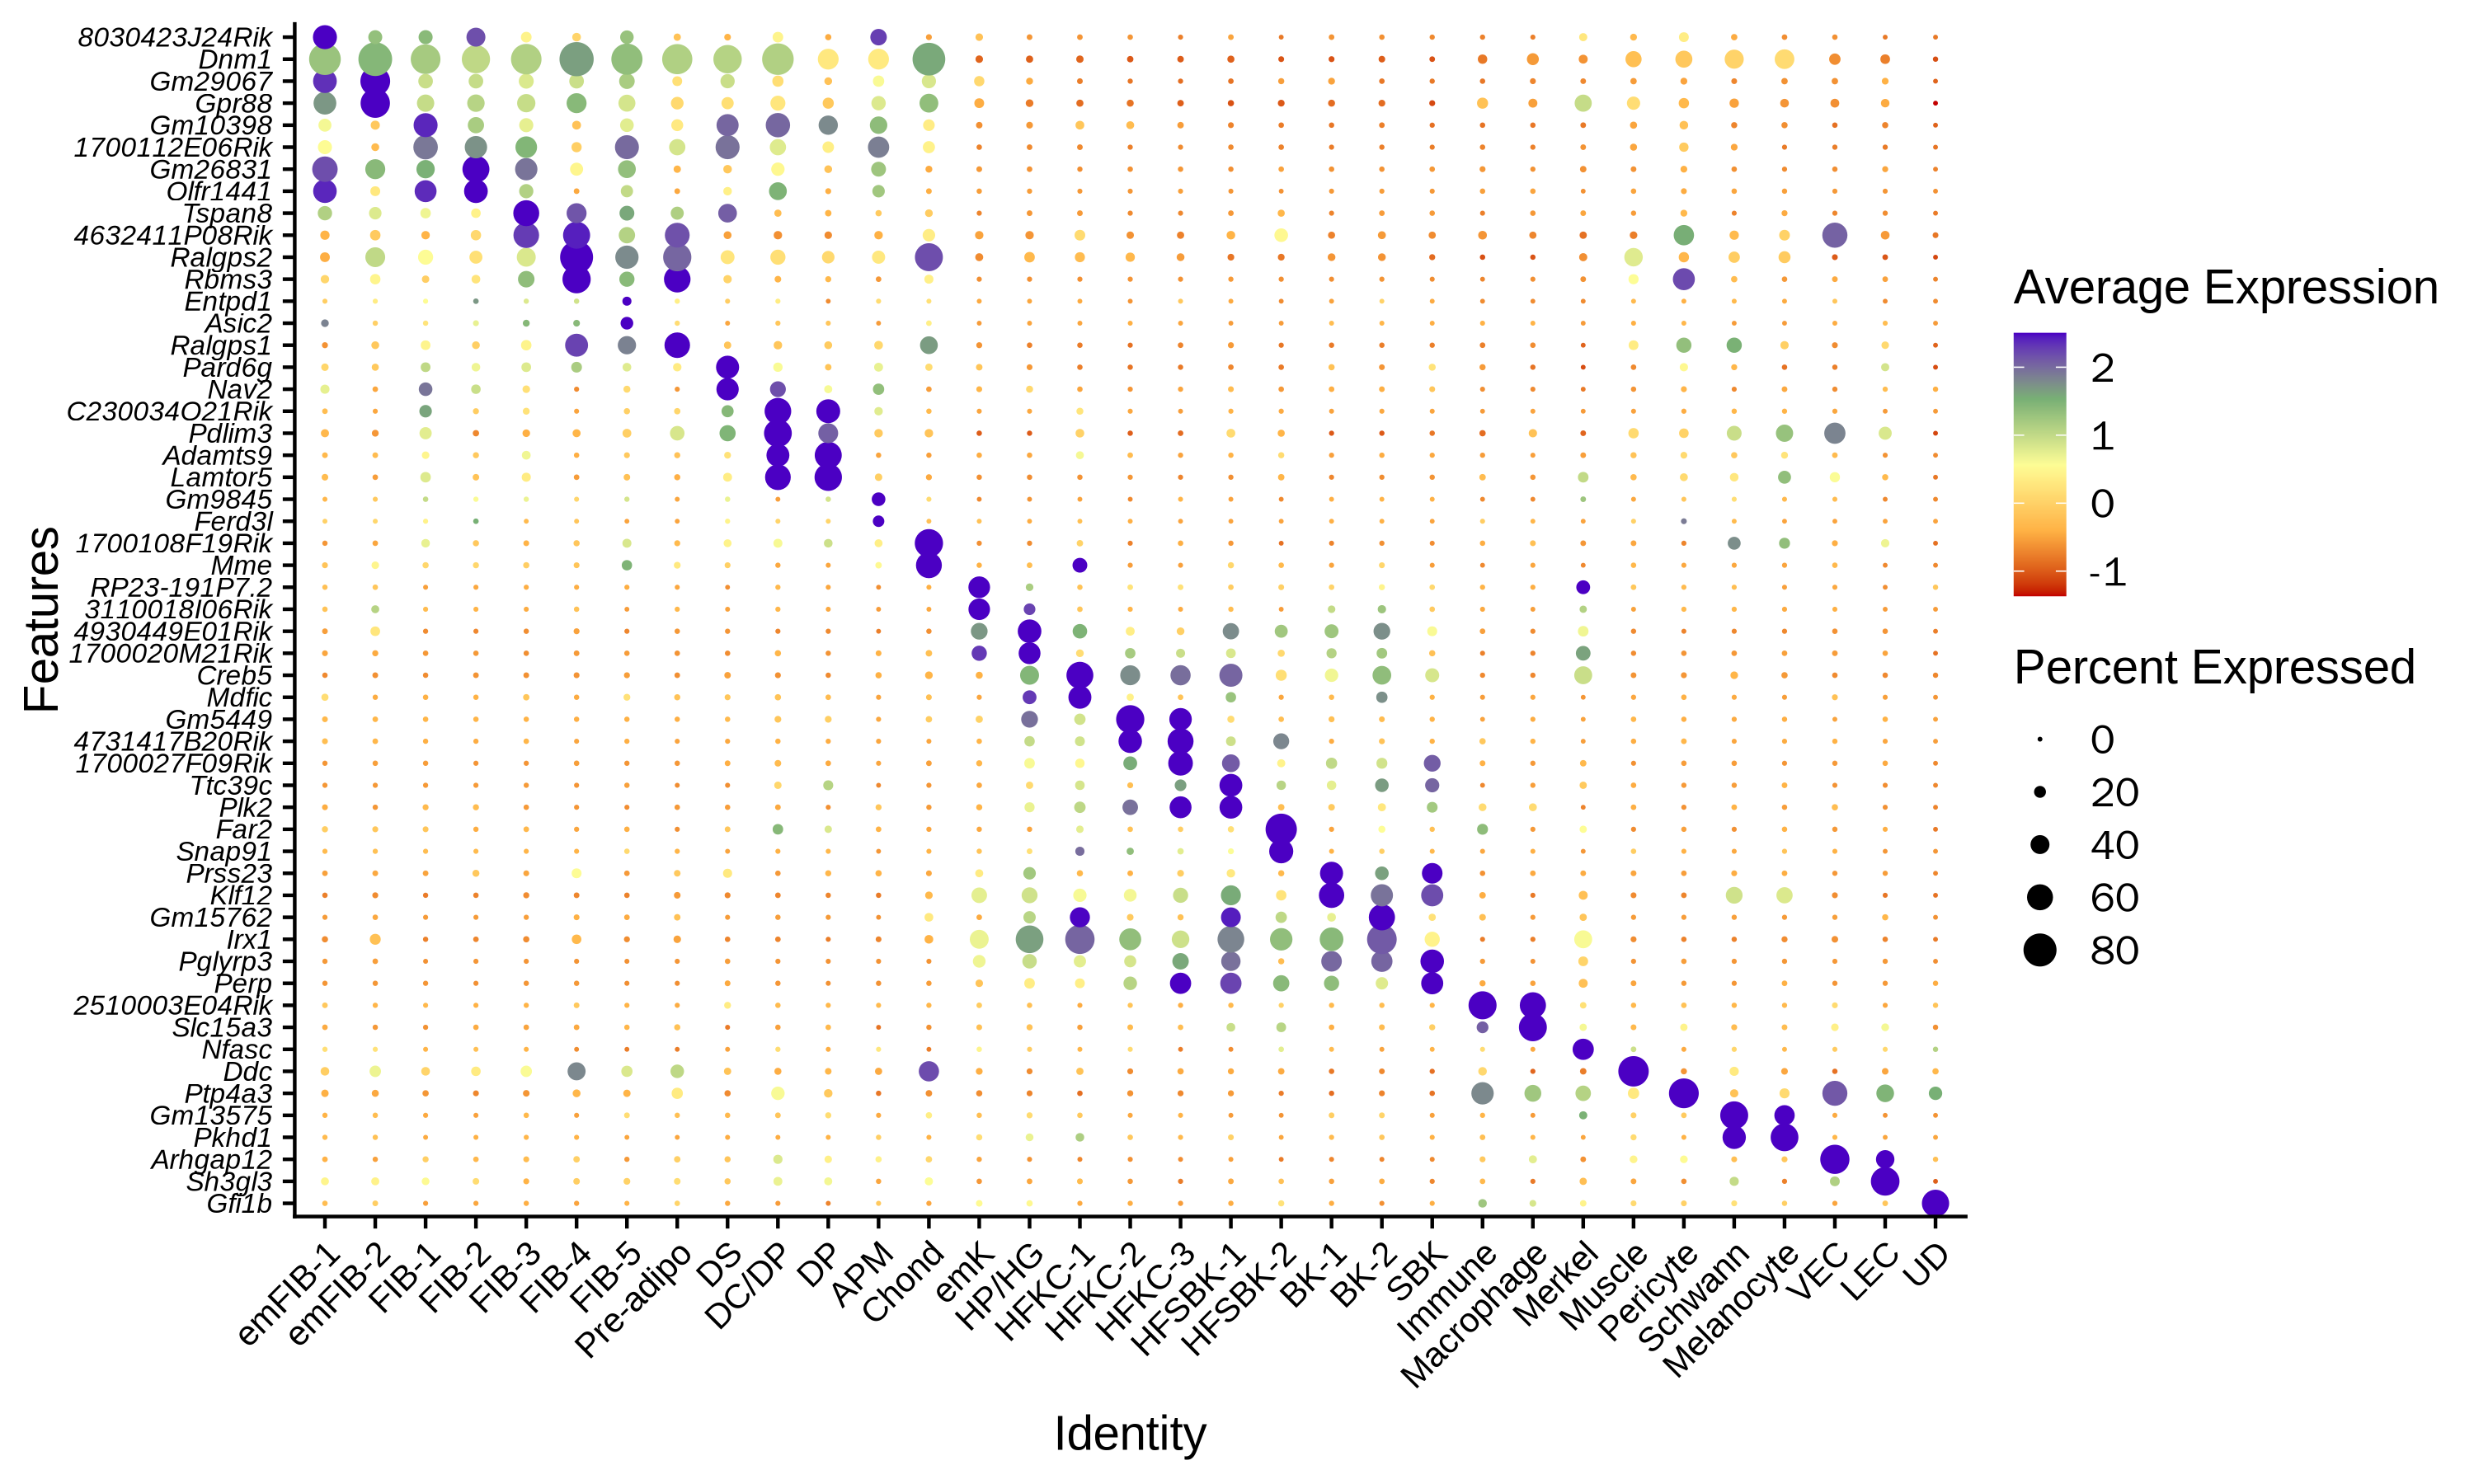

In [50]:
# First, draw the heatmap using DoHeatmap
DotPlot(
  object = skin, dot.scale=4,
  features = rev(top2_peaks_unique), assay="peaks", scale=T) + #scale_color_gradientn(colors = c("#440154FF", "#414487FF",  "#2A788EFF", "#22A884FF",  "#7AD151FF", "#FDE725FF")) +
scale_color_gradientn(colors = c("#c30000", "#ffb346",  "#FDFD96", "#78b075",  "#4b00c3")) +
#geom_point(aes(size = pct.exp), shape = 21, fill = NA, color = "black", stroke = 0.1) +  # Scale stroke to a fixed size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size=10),  # Rotate x-axis labels 45 degrees
    axis.text.y = element_text(face = "italic", size=8),  # Italicize y-axis labels (features)
  ) +
  coord_flip() +  # Rotate the plot (optional, if needed)+ 
  scale_x_discrete(labels = top2_peaks_replaced)  # Replace y-axis labels with closest features

In [51]:
ggsave("./Fig1_rxiv/250221.peak.dotplot.svg", width =10, height =6, units = 'in')

In [54]:
DefaultAssay(skin) <- "RNA"

In [84]:
features <- c("Twist2", "Crabp1", "Dpp4", "Wif1", "Apcdd1", "Dlk1", "Fabp4", "Mfap5", "Ebf2", "Meox2", "Col11a1", "Cd200", "Sox11", "Sox18", "Col23a1", 'Sox2', "Actg2", "Itga8", "Matn4", 
    "Trp63", "Lhx2", "Barx2", "Msx2", "Krt35", "Krt71", "Krt6a", "Krt79", "Krt5", "Krt1", "Ptprc", "Cd86", "Krt19", "Msc", "Rgs5", "Sox10", "Dct", "Pecam1", "Lyve1")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


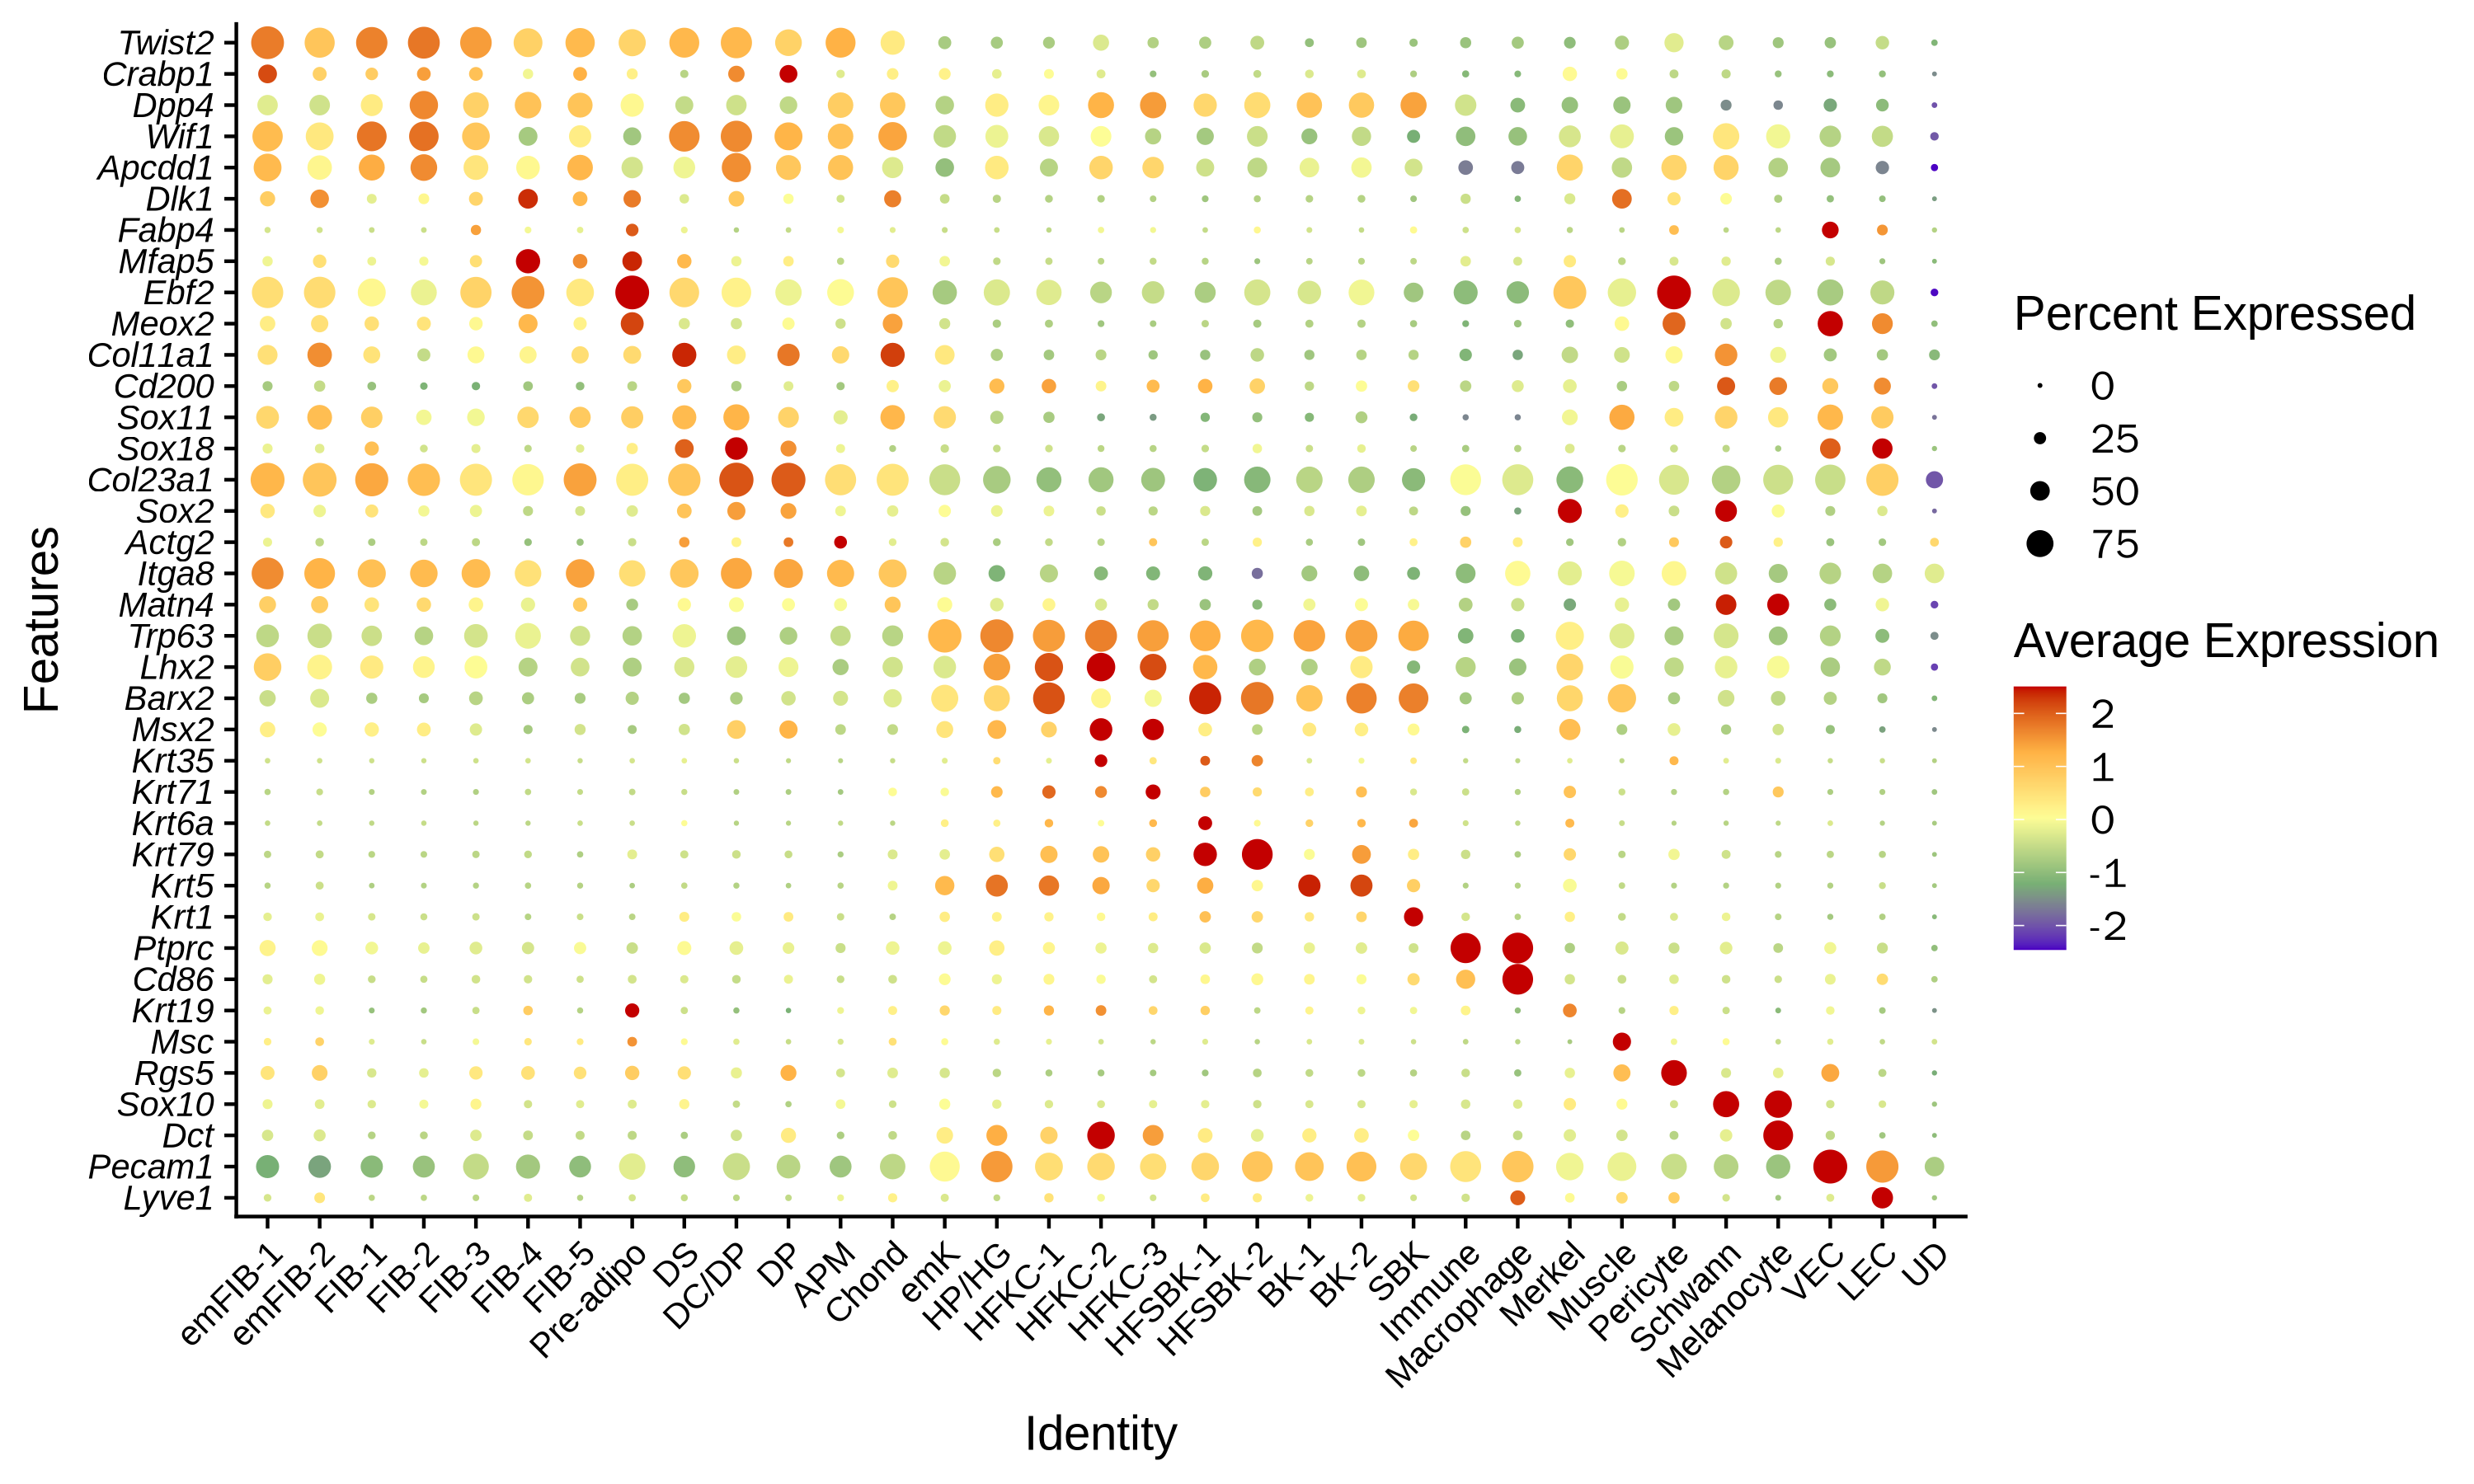

In [85]:
# Generate the DotPlot and apply the custom y-axis order
DotPlot(skin, dot.scale = 4, features = rev(features)) +
  scale_color_gradientn(colors = c("#4b00c3", "#78b075", "#FDFD96", "#ffb346", "#c30000")) +  # Eye-catching color scheme
  scale_y_discrete(limits = custom_order) +  # Custom y-axis order (clusters)
#geom_point(aes(size = pct.exp), shape = 21, fill = NA, color = "black", stroke = 0.1) +  # Scale stroke to a fixed size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size=10),  # Rotate x-axis labels 45 degrees
    axis.text.y = element_text(face = "italic", size=10),  # Italicize y-axis labels (features)
  ) +
  coord_flip()  # Rotate the plot (optional, if needed)

In [86]:
ggsave("./Fig1_rxiv/250221.geneactivity.dotplot.svg",  width =10, height =6, units = 'in')